 **Hypothesis testing** methods such as <br>
1.  **Normal Distribution**<br>
2. **Student t Distribution**<br>
3. **ANOVA**<br>

Dataset : Payroll Dataset (https://www.kaggle.com/datasets/cityofLA/city-payroll-data)


In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
from scipy import stats
import sklearn
from sklearn import metrics

In [6]:
payroll = pd.read_csv("data.csv")

<ipython-input-6-16d328c9df25>:1: DtypeWarning: Columns (4,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  payroll = pd.read_csv("data.csv")


**Data Cleansing**

In [7]:
payroll = payroll[pd.notnull(payroll['Payroll Department'])]
payroll.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
payroll.rename(columns={'Job Class Title' : 'Job_title'}, inplace = True)
payroll.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)

In [8]:
for i in ['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    payroll[i] = payroll[i].str.replace('$','')

<ipython-input-8-fa788f9d8982>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  payroll[i] = payroll[i].str.replace('$','')


**Outlier removal**

In [9]:
payroll = payroll[payroll.Annual_sal != 0]  
payroll = payroll[payroll.Base_Pay != 0]
payroll.Annual_sal = payroll.Annual_sal.astype(float)
payroll.Base_Pay = payroll.Base_Pay.astype(float)

<ipython-input-10-e766d3b9e6e5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(payroll.Annual_sal,color = 'darkgreen')


<AxesSubplot:xlabel='Annual_sal', ylabel='Density'>

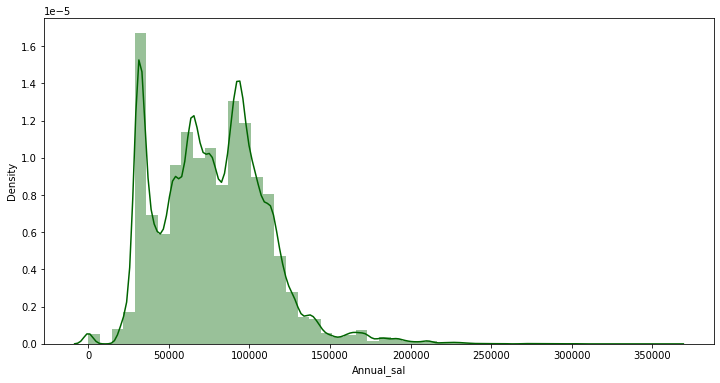

In [10]:
plt.figure(figsize = (12,6))
sns.distplot(payroll.Annual_sal,color = 'darkgreen')

**Creating different Sample  from the population**

In [11]:
payroll_2015 = payroll[payroll.Year ==2015]
payroll_2016 = payroll[payroll.Year ==2016]

**Calculating the Population Parameters**

In [12]:
pop_mean_2015 = payroll_2015['Annual_sal'].mean()
pop_std_2015 = statistics.stdev(payroll_2015.Annual_sal)
print("Population Mean: "+str(pop_mean_2015))
print("Population Standard Deviation: "+str(pop_std_2015))

Population Mean: 76046.39152504776
Population Standard Deviation: 34232.25489729045


**Calculating the Sample Parameters**

In [13]:
print("Population Mean: "+str(payroll_2016['Annual_sal'].mean()))
payroll_2016_sample = payroll_2016.sample(frac=0.10)
sample_mean_2016 = payroll_2016_sample['Annual_sal'].mean()
print("Sample Mean: "+str(sample_mean_2016))
sample_std_2016 = statistics.stdev(payroll_2016_sample.Annual_sal)
print("Sample Standard Deviation: "+str(sample_std_2016))

Population Mean: 78711.19987224769
Sample Mean: 78736.1397429306
Sample Standard Deviation: 33656.13115686943


**Hypothesis Testing**

<b>Normal distribution</b><br><br>
<b>Null Hypothesis</b> : Pay does not increase in 2016<br>
<b>Alternate Hypothesis</b>: It increases<br>
<b>Population parameters</b>: Mean = pop_mean_2015, standard deviation = pop_std_2015<br>
<b>Sample parameters</b> :   Mean = sample_mean_2016, standard deviation = sample_std_2016<br>

In [15]:
import math
# Confidence Level 95 %  for one sided Normal curve
alpha = 0.05
zscore_critical = 1.65 
# Calculate the test statistics 
zscore_test_stat = ((sample_mean_2016 - pop_mean_2015)*math.sqrt(8916))/sample_std_2016
print(zscore_test_stat)

7.546272207087888


<b>Conclusion</b>: As the test statistics fall into the rejection region the null hypothesis is rejected<br>
and it can be concluded that the Annual salaries increase in 2016.<br>
However, we will first check for the <b>Type 1</b> and <b>Type 2 </b>Errors

**Type 1 type 2 hypothesis error**<br>
In statistical hypothesis testing, a type I error is the incorrect rejection of a true null hypothesis (a "false positive"), while a type II error is incorrectly retaining a false null hypothesis (a "false negative").

In [16]:
# we are basically checking the true value of the population characteristics
pop_mean_2016 = payroll_2016['Annual_sal'].mean()
pop_std_2016 = statistics.stdev(payroll_2016.Annual_sal)

zscore_error = ((pop_mean_2016 - pop_mean_2015)/pop_std_2016)
print(zscore_error)

0.07937359898023319


We can clearly see that we encountered a Type 1 error as the population mean is well within acceptable region

**Student T-distribution**<br>
**Null Hypothesis**: pay does not increase in 2016<br>
**Alternate Hypothesis**: it increases<br>
**Population parameters**: Mean = pop_mean_2015, standard deviation = pop_std_2015<br>
**Sample parameters** : Mean = sample_mean_2016, standard deviation = sample_std_2016<br>

In [17]:
#Calculating the Sample Parameters**
payroll_2014 = payroll[payroll.Year ==2014]
payroll_2015 = payroll[payroll.Year ==2015]
# Creating Sample distribution for T statistics
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)

In [18]:
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)
N = len(payroll_t_2015_sample)
sample_mean_2015 = payroll_t_2015_sample['Annual_sal'].mean()
sample_std_2015 = statistics.stdev(payroll_t_2015_sample.Annual_sal)
pop_std_2014  = statistics.stdev(payroll_2014.Annual_sal)
pop_mean_2014 = payroll_2014['Annual_sal'].mean()

In [19]:
# Confidence Level 95 %  for one sided T curve
t_critical = 1.311

# Calculate the test statistics 
tscore_test_stat = ((sample_mean_2015 - pop_mean_2014)*math.sqrt(N))/sample_std_2015

print(tscore_test_stat)

-1.3184606402040373


Depending on the Test score , we can accept/Reject the Null

**** F Distribution and ANOVA**

The means from three different samples are compared using ANOVA<br>
It is similar to applying t-tests over multiple sample
ANOVA : https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php

In [20]:
payroll_2014 = payroll[payroll.Year ==2014]
payroll_2014_elec = payroll_2014[payroll_2014.Job_title == 'Electrician']
payroll_2015_elec = payroll_2015[payroll_2015.Job_title == 'Electrician']
payroll_2016_elec = payroll_2016[payroll_2016.Job_title == 'Electrician']
sample_elec_2014 = payroll_2014_elec.sample(frac=0.47)
sample_elec_mean_2014 = sample_elec_2014['Base_Pay'].mean()
print("Sample Mean 2014 "+str(sample_elec_mean_2014))
sample_elec_2015 = payroll_2015_elec.sample(frac=0.41)
sample_elec_mean_2015 = sample_elec_2015['Base_Pay'].mean()
print("Sample Mean 2015 "+str(sample_elec_mean_2015))
sample_elec_2016 = payroll_2016_elec.sample(frac=0.22)
sample_elec_mean_2016 = sample_elec_2016['Base_Pay'].mean()
print("Sample Mean 2016 "+str(sample_elec_mean_2016))
# Creating the Samples of the base pays over three years
sam_1 = sample_elec_2014.Base_Pay
sam_2 = sample_elec_2015.Base_Pay
sam_3 = sample_elec_2016.Base_Pay

Sample Mean 2014 70809.73542857142
Sample Mean 2015 70892.46914285714
Sample Mean 2016 32784.19571428571


**Calculating the test statistics**

In [24]:
f, p = stats.f_oneway(sam_1, sam_2, sam_3 )
print ('F value:', f)
print ('P value:', p, '\n')


F value: 44.82304738928397
P value: 1.0742616900812439e-14 




P value is very low, hence null hypothesis is rejected 
